## **Quickstart Guide**

This guide covers a simple workflow to help you get started with twinLab. In this notebook, we will perform the following steps:

1. Upload a dataset to twinLab.
2. Use `Emulator.train` to train a surrogate model.
3. Use the model to make a prediction with `Emulator.predict`.
4. Visualise the results and their uncertainty.

In [1]:
!pip install twinlab -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 621.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [2]:
# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Project imports
import twinlab as tl


          ====== TwinLab Client Initialisation ======
          Version     : 2.5.0
          Server      : https://twinlab.digilab.co.uk



### **Set your API Key**

If you don't already have one, please vist [https://www.digilab.co.uk/contact](https://www.digilab.co.uk/contact). For security, we normally recommend performing this step with a `.env` file or `secrets`.


In [3]:
tl.set_api_key("YOUR_API_KEY")

### **1. Upload a dataset to twinLab**

Your dataset must be presented as a `pandas.DataFrame` object, or a filepath which points to a `csv` file that can be parsed to a `pandas.DataFrame` object. **The dataset must be formatted with clearly labelled columns.** In `twinlab`, data is expected to be in column-feature format, meaning each row represents a single data sample, and each column represents a data feature (parameter).

`twinLab` contains a `Dataset` class with attributes and methods to process, view and summarise the dataset. Datasets must be created with a `dataset_id` which is used to access them. The dataset can be uploaded using the `upload` method.

In this example, we will label the input (predictor) variable `x` and the output variable `y`.


In [10]:
x = [
    0.6964691855978616,
    0.28613933495037946,
    0.2268514535642031,
    0.5513147690828912,
    0.7194689697855631,
    0.42310646012446096,
    0.9807641983846155,
    0.6848297385848633,
    0.48093190148436094,
    0.3921175181941505,
]

y = [
    -0.8173739564129022,
    0.8876561174050408,
    0.921552660721474,
    -0.3263338765412979,
    -0.8325176123242133,
    0.4006686354731812,
    -0.16496626502368078,
    -0.9607643657025954,
    0.3401149876855609,
    0.8457949914442409,
]

# Create a dataframe using the above arrays
df = pd.DataFrame({"x": x, "y": y})

# Check the dataframe before uploading
display(df.head())

# Intialise a Dataset object and give it a name
dataset = tl.Dataset("Quickstart_Dataset")

# Upload the dataset, passing in the dataframe
dataset.upload(df)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518


### **2. Train an emulator**

The `Emulator` class is used to train and implement your surrogate models. As with datasets, an `id` is defined. This is what the model will be saved as in the cloud.

When training a model, the arguments are passed in using a `TrainParams` object. `TrainParams` contains parameters you can tweak when training your model. You can find the defaults in the documentation.

To train the model we use the `Emulator.train` method, passing in the `TrainParams` object as an argument.


In [11]:
# Initialise emulator
emulator = tl.Emulator("Quickstart_Model")

# Define the training parameters for your emulator. E.g.
params = tl.TrainParams(train_test_ratio=1.0)

# Train the mulator using the train method
emulator.train(
    dataset=dataset,
    inputs=["x"],
    outputs=["y"],
    params=params
    )

### **3. Make Predictions using the Trained Emulator**

The surrogate model is now trained and saved to the cloud under the `emulator_id`. It can be used to make predictions.

You'll need a dataset of inputs for which you want to find outputs. Ensure that this is a `pandas.DataFrame` object. Then call `Emulator.predict`, with the evaluation dataset as the keyword argument.


In [12]:
# We'll define some example inputs for the dataset
x_predict = np.linspace(0, 1, 128)

# And convert them to a DataFrame
df_predict = pd.DataFrame({"x": x_predict})

# Now we'll predict the results.
# This returns a tuple with two dataframes:
# 1. The mean prediction for each input;
# 2. The standard deviation for each.
predictions_mean, predictions_std = emulator.predict(df_predict)

display(predictions_mean)
display(predictions_std)

,y
0,0.618116
1,0.629521
2,0.641034
3,0.652643
4,0.664334
...,...
123,-0.207133
124,-0.185094
125,-0.163708
126,-0.143000


,y
0,0.653885
1,0.638148
2,0.621944
3,0.605284
4,0.588181
...,...
123,0.183473
124,0.182240
125,0.183786
126,0.188324


In [13]:
# We'll merge these into a single dataframe
result_df = pd.concat([df_predict, predictions_mean, predictions_std], axis=1)

# And rename the columns to make it clearer
result_df.columns = ["example input", "mean prediction", "std dev"]

# Let's have a look!
display(result_df)

,example input,mean prediction,std dev
0,0.000000,0.618116,0.653885
1,0.007874,0.629521,0.638148
2,0.015748,0.641034,0.621944
3,0.023622,0.652643,0.605284
4,0.031496,0.664334,0.588181
...,...,...,...
123,0.968504,-0.207133,0.183473
124,0.976378,-0.185094,0.182240
125,0.984252,-0.163708,0.183786
126,0.992126,-0.143000,0.188324


### **4. Viewing the Results**

`Emulator.predict` outputs mean values for each input and their standard deviation; this gives the abilty to nicely visualise the uncertainty in results, using `Emulator.plot`


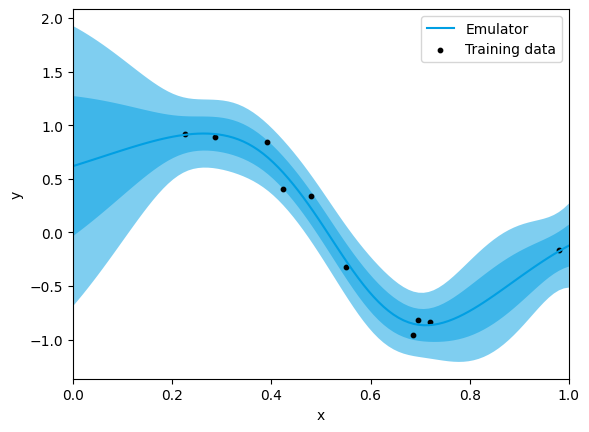

In [14]:
# Plot results
plt=emulator.plot(
    x_axis="x",
    y_axis="y",
    x_lim=(0, 1.0)
)
plt.scatter(df["x"], df["y"], color="black", label="Training data", s=10,alpha=1)
plt.legend()
plt.show()

### **Deleting datasets and campaigns**

You can delete your datasets and emulators. Please be aware that this is permanent. Always consider keeping your data backed-up. `Emulator.delete` and `Dataset.delete` delete the emulator and the dataset respectively.


In [9]:
# Delete dataset
dataset.delete()

# Delete campaign
emulator.delete()